In [1]:
import gym


#定义环境
class MyWrapper(gym.Wrapper):

    def __init__(self):
        env = gym.make('Pendulum-v1', render_mode='rgb_array')
        super().__init__(env)
        self.env = env
        self.step_n = 0

    def reset(self):
        state, _ = self.env.reset()
        self.step_n = 0
        return state

    def step(self, action):
        state, reward, done, _, info = self.env.step(action)
        self.step_n += 1
        if self.step_n >= 200:
            done = True
        return state, reward, done, info


env = MyWrapper()

env.reset()

array([ 0.4015109, -0.9158542, -0.5937396], dtype=float32)

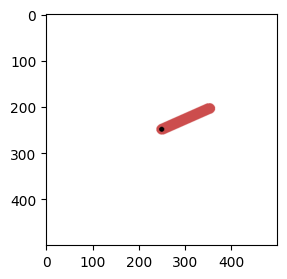

In [2]:
from matplotlib import pyplot as plt

%matplotlib inline


#打印游戏
def show():
    plt.figure(figsize=(3, 3))
    plt.imshow(env.render())
    plt.show()


show()

In [3]:
#认识游戏环境
def test_env():
    print('env.observation_space=', env.observation_space)
    print('env.action_space=', env.action_space)

    state = env.reset()
    action = env.action_space.sample()
    next_state, reward, done, info = env.step(action)

    print('state=', state)
    print('action=', action)
    print('next_state=', next_state)
    print('reward=', reward)
    print('done=', done)
    print('info=', info)


test_env()

env.observation_space= Box([-1. -1. -8.], [1. 1. 8.], (3,), float32)
env.action_space= Box(-2.0, 2.0, (1,), float32)
state= [-0.6658319  -0.74610174  0.6986953 ]
action= [0.21158014]
next_state= [-0.6594339  -0.75176257  0.170856  ]
reward= -5.336123894632103
done= False
info= {}


In [4]:
from stable_baselines3 import A2C
from stable_baselines3.common.env_util import make_vec_env

#初始化模型
model = A2C(
    policy='MlpPolicy',
    env=make_vec_env(MyWrapper, n_envs=8),  #使用N个环境同时训练
    learning_rate=1e-3,
    n_steps=5,  #运行N步后执行更新,batch_size=n_steps*环境数量
    gamma=0.9,
    verbose=0)

model

In [5]:
from stable_baselines3.common.evaluation import evaluate_policy

evaluate_policy(model, env, n_eval_episodes=20, deterministic=False)

/root/anaconda3/envs/pt39/lib/python3.9/site-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


(-1298.6173694218974, 316.6596681170837)

In [6]:
# #训练
# model.learn(200_0000, progress_bar=True)

# #保存模型
# model.save('save/3.A2C.Pendulum')

In [7]:
#加载模型
model = A2C.load('save/3.A2C.Pendulum')

evaluate_policy(model, env, n_eval_episodes=20, deterministic=False)

(-272.44372607399566, 229.55795657113933)

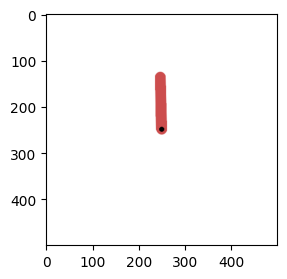

-790.1836060086542 200 [-7.668710652582663, -7.749618011644003, -7.832646254313315, -7.921582247022011, -8.003297012144314, -8.077874110724991, -8.138879355754458, -8.174623073417326, -8.185969080012654, -8.172693743584139, -8.135336800842172, -8.075243444865041, -7.994511617168069, -7.895918790474709, -7.782829853259477, -7.659087555225119, -7.528887340017541, -7.396639297729064, -7.26682123210802, -7.143828101645566, -7.031823942575098, -6.934602488533198, -6.855461965059504, -6.797098135017774, -6.761518003848353, -6.749975141379802, -6.76292672826225, -6.800012352048866, -6.860055140765672, -6.940574601792137, -7.046412540429422, -7.17526720178951, -7.335488503377806, -7.5370220590869454, -7.790995238546467, -8.136133868918487, -8.620262329937702, -9.324069077448666, -10.18820889170464, -9.946653556031766, -9.229233150624875, -8.465572850169128, -7.6803721318014535, -6.901019519229578, -6.15535633710814, -5.468933875357536, -4.862706300182905, -4.351861004713439, -3.945954435729675

In [8]:
from IPython import display
import random


def test():
    state = env.reset()
    reward_sum = []
    over = False
    while not over:
        action, _ = model.predict(state)
        state, reward, over, _ = env.step(action)
        reward_sum.append(reward)

        if len(reward_sum) % 5 == 0:
            display.clear_output(wait=True)
            show()

    print(sum(reward_sum), len(reward_sum), reward_sum)


test()